<a href="https://colab.research.google.com/github/Amityadav96/Machinelearning/blob/main/Decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Decision Tree Classifier using Iris Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.tree import plot_tree

In [ ]:
from sklearn.tree import export_graphviz
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.shape

(150, 6)

In [ ]:
target = df['Species']
df1 = df.copy()
df1 = df1.drop('Species' , axis = 1)
df1.shape

(150, 5)

In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

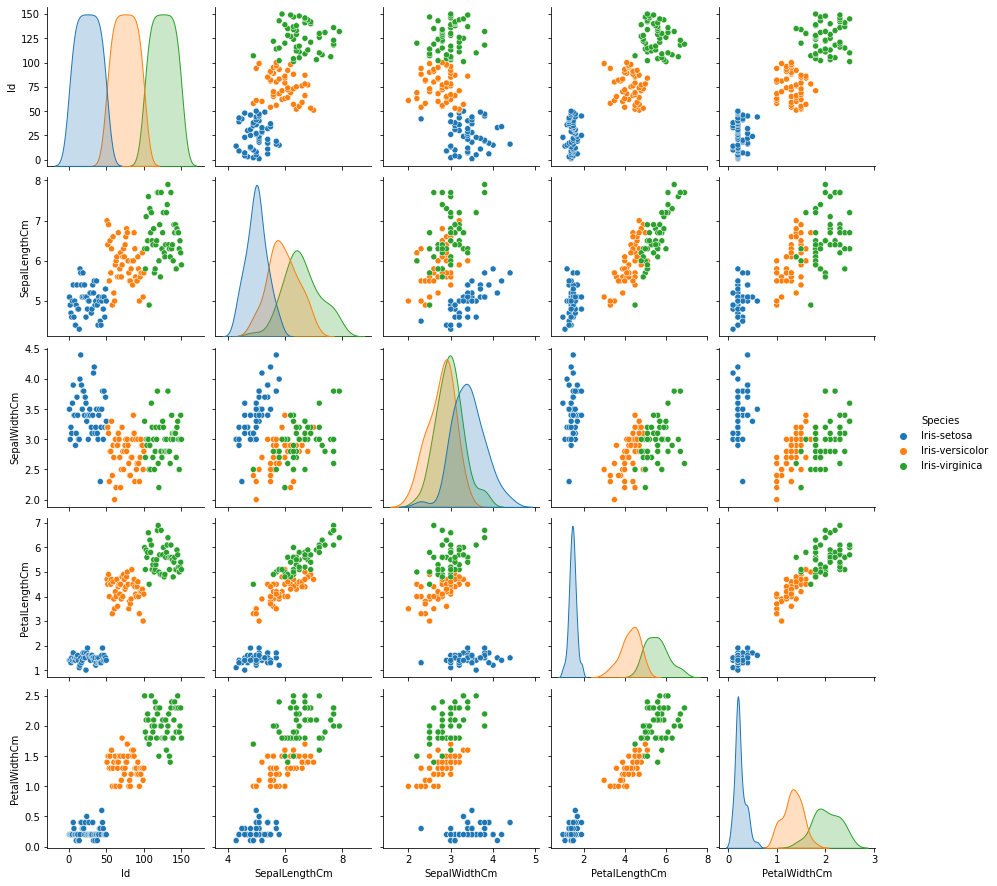

In [ ]:
sns.pairplot(df , hue='Species')

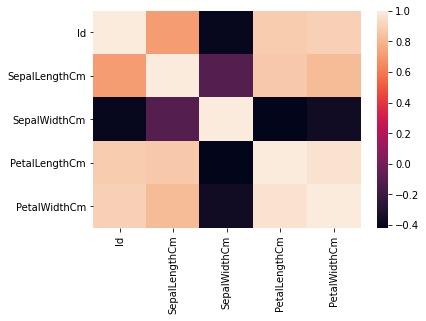

In [ ]:
sns.heatmap(df.corr()) 

In [ ]:
X = df.iloc[: , [0,1,2,3]].values

le = LabelEncoder()

df['Species'] = le.fit_transform(df['Species'])

y = df['Species'].values

df.shape

(150, 6)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape

(100, 4)

In [ ]:
X_test.shape

(50, 4)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = clf.predict(X_test)
print('Classification Report \n' , classification_report(y_test,y_pred))

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

1.0

In [ ]:
confusion_matrix(y_test , y_pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 16]])

Text(0.5, 1.0, 'Accuracy Score: 1.0')

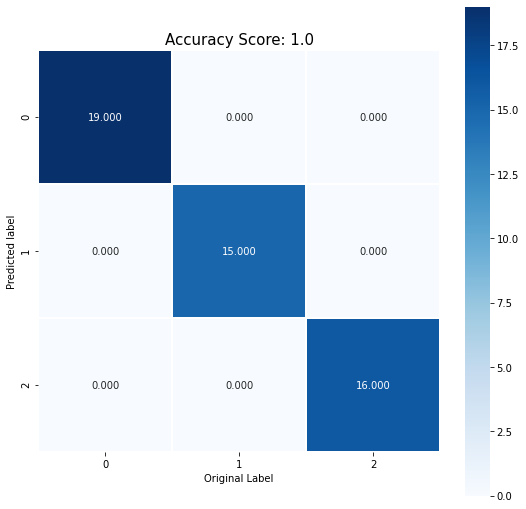

In [ ]:
cm = confusion_matrix(y_test , y_pred)
plt.figure(figsize=(9,9))

sns.heatmap(cm , annot=True , fmt='.3f' , 
            linewidths=.5 , 
            square=True,
            cmap='Blues');

plt.xlabel('Original Label');
plt.ylabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(clf.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [ ]:
from sklearn.tree import plot_tree

[Text(2678.3999999999996, 2265.0, 'X[0] <= 100.5\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'), Text(1785.6, 1359.0, 'X[3] <= 2.45\ngini = 0.498\nsamples = 66\nvalue = [31, 35, 0]'), Text(892.8, 453.0, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'), Text(2678.3999999999996, 453.0, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'), Text(3571.2, 1359.0, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]')]


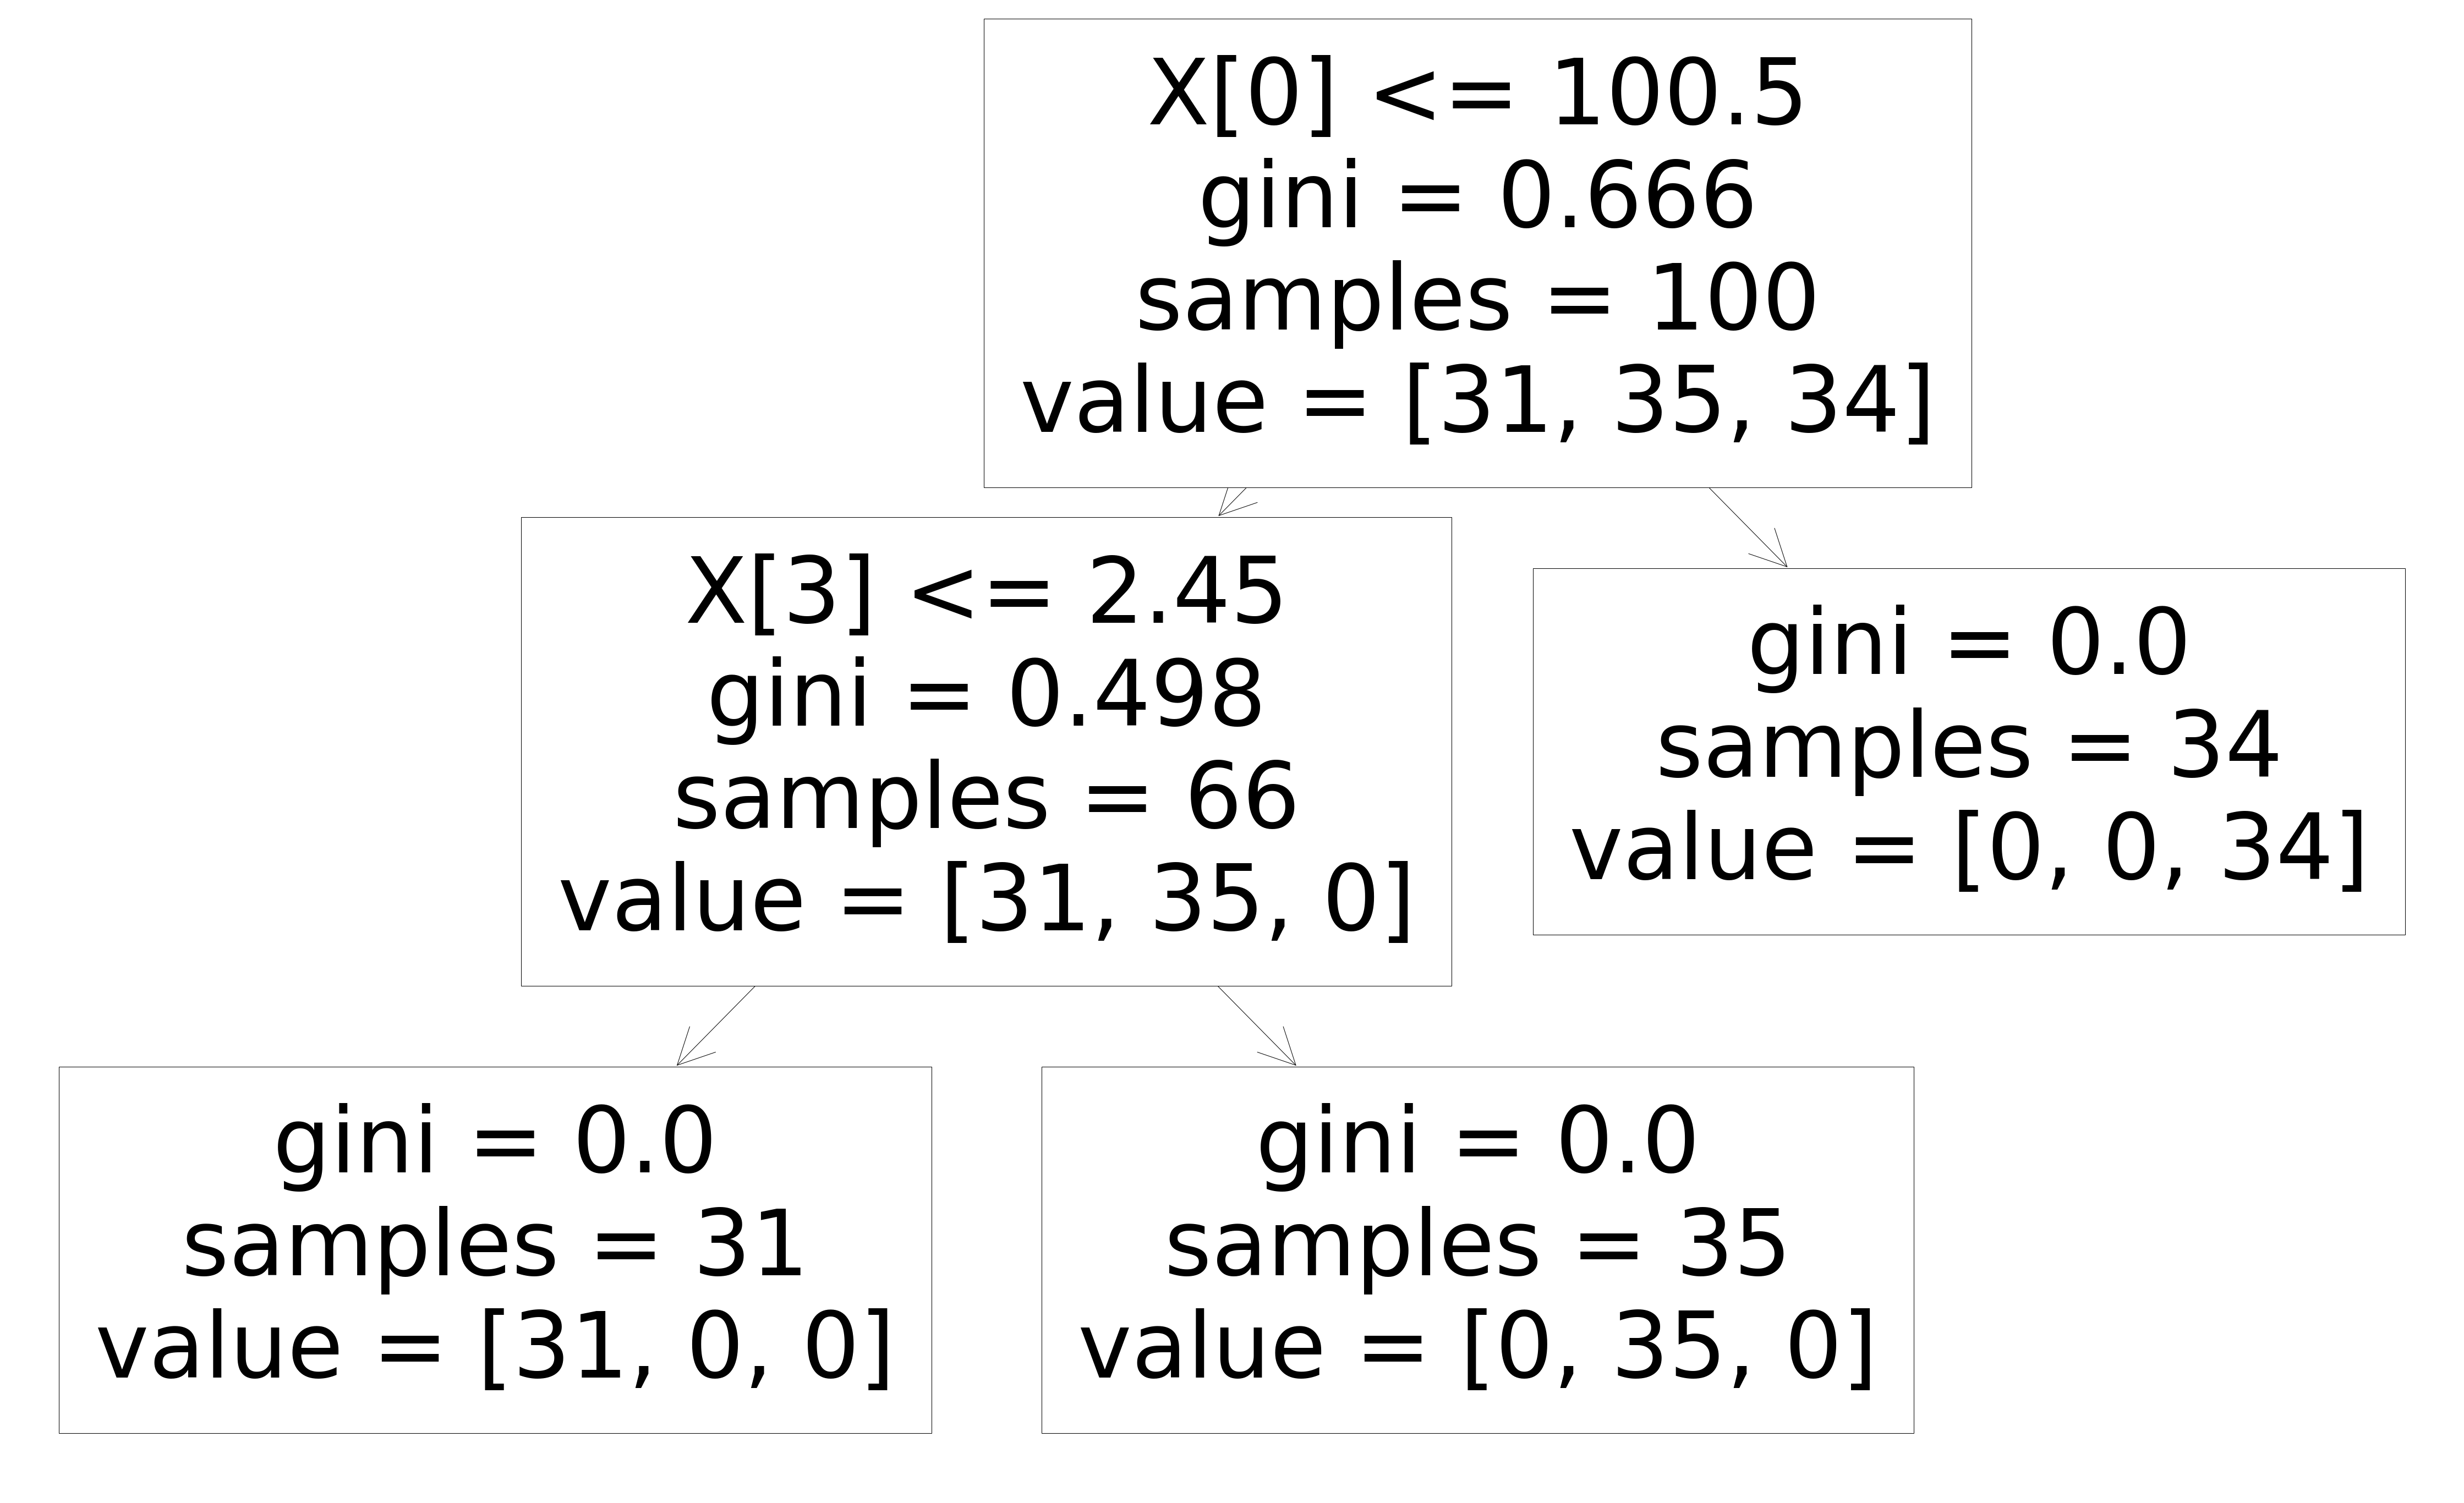

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80 , 50

print(plot_tree(clf))

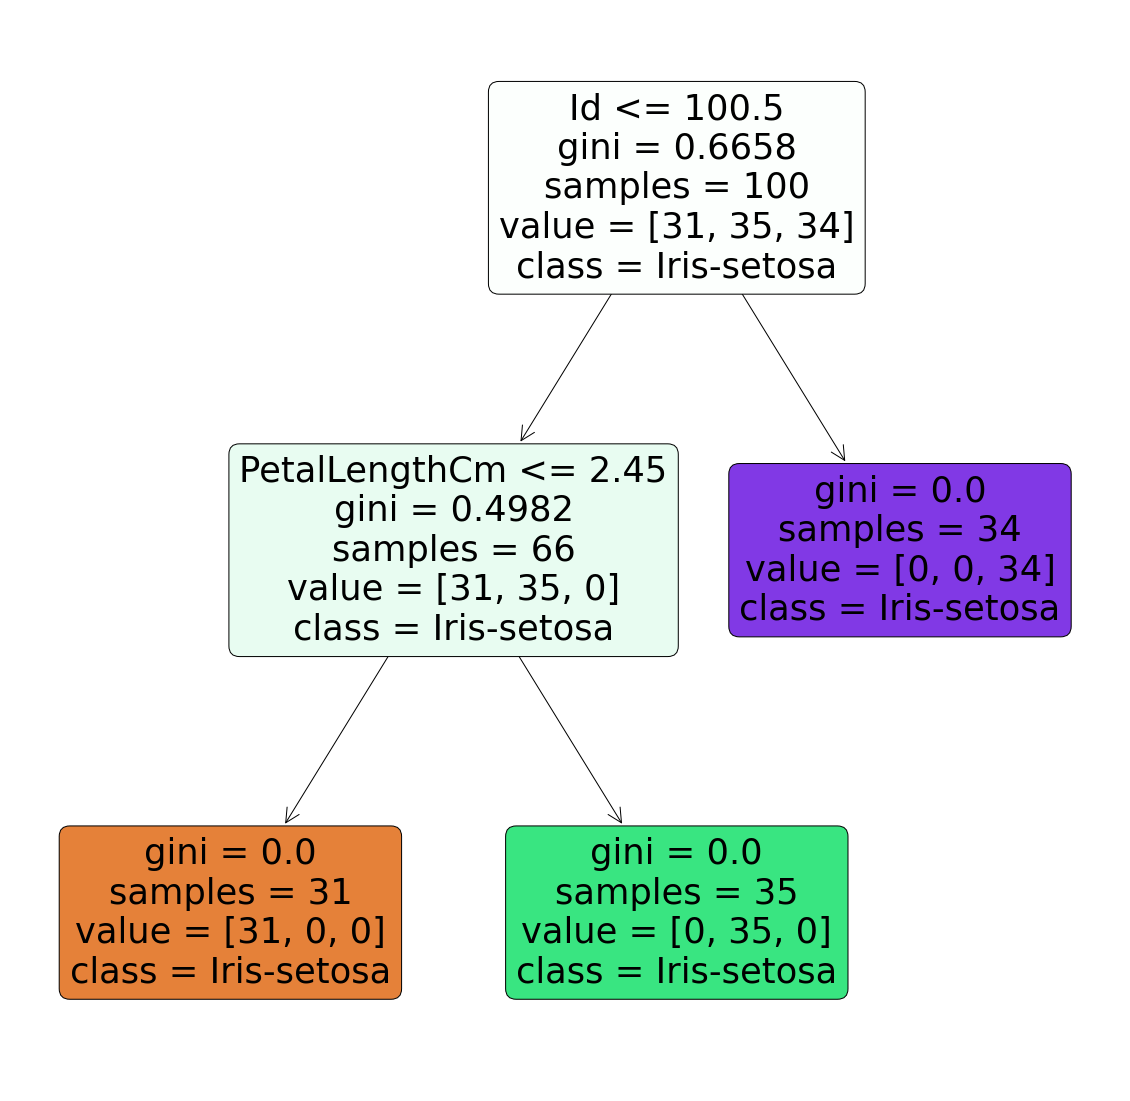

In [ ]:
plt.figure(figsize = (20,20))
dec_tree = plot_tree(clf, feature_names = df1.columns, 
                     class_names = target.values, filled = True , precision = 4, rounded = True);